# DATA572: Supervised Learning - Project

## Project Overview

The objective of this project is to develop a small yet performant machine learning model to predict the survival of passengers aboard the Titanic. Emphasis is placed on building an efficient solution that balances high predictive accuracy with model simplicity. We explore and evaluate three distinct supervised learning algorithms, alongside a state-of-the-art deep learning method (transformer), to identify the most effective approach.

Team Members

Member 1: Mohammad Zaed Iqbal Khan

Member 2: Manpreet Singh

Member 3: Yihang Wang

# Data Preprocessing : Zaed

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('titanic_augmented.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_deck,cabin_room_number,booking_reference,service_id,cabin_score,name_word_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,7.250,3.034483,Unknown,NaN,92490,221958,6.134152,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,71.283,0.533084,C,85.0,15655423,771155,4.182430,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,7.925,3.280757,Unknown,NaN,90218500,231932,9.327285,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,2,26.550,0.659134,C,123.0,2493079,465838,8.660639,7
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,8.050,4.347826,Unknown,NaN,59517148,359178,0.452187,4


In [108]:
# Summary stats
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,name_length,family_size,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_room_number,booking_reference,service_id,cabin_score,name_word_count
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,200.00000,8.910000e+02,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,26.965208,1.904602,0.602694,1.787879,17.789001,1.572536,50.49000,5.108118e+07,536369.988777,4.956762,4.067340
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,9.281607,1.613459,0.489615,1.361142,21.218127,1.661773,35.39497,2.838174e+07,261551.630299,2.915177,1.168866
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.00000,9.249000e+04,102869.000000,0.046320,3.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,20.000000,1.000000,0.000000,1.000000,7.762500,0.116026,22.00000,2.831962e+07,299638.000000,2.325861,3.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,25.000000,1.000000,1.000000,1.000000,8.850000,1.175795,43.00000,5.128853e+07,535564.000000,4.954913,4.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,30.000000,2.000000,1.000000,2.000000,24.288000,2.543045,77.25000,7.493131e+07,757663.000000,7.479345,4.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,82.000000,11.000000,1.000000,7.000000,221.779000,9.779559,148.00000,9.997588e+07,999684.000000,9.997177,14.000000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           889 non-null    object 
 12  name_length        891 non-null    int64  
 13  title              891 non-null    object 
 14  title_group        891 non-null    object 
 15  family_size        891 non-null    int64  
 16  is_alone           891 non

Cabin and cabin_room_number have ~600 null values, we will drop these columns.

In [110]:
cols_to_drop = ['Cabin', 'cabin_room_number']
df = df.drop(columns=cols_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Embarked           889 non-null    object 
 11  name_length        891 non-null    int64  
 12  title              891 non-null    object 
 13  title_group        891 non-null    object 
 14  family_size        891 non-null    int64  
 15  is_alone           891 non-null    int64  
 16  ticket_group_size  891 non

We have null values in Age and Embarked. We will impute the missing age values with the median, to avoid
affect of outliers (too young or too old). This will be done after splitting the dataset into
train and test to avoid data leakage. We will impute the missing Embarked values with the 
mode as there are only two missing values.

In [111]:
# Replace null values in Embarked with mode
mode_val = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_val)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Embarked           891 non-null    object 
 11  name_length        891 non-null    int64  
 12  title              891 non-null    object 
 13  title_group        891 non-null    object 
 14  family_size        891 non-null    int64  
 15  is_alone           891 non-null    int64  
 16  ticket_group_size  891 non

The following columns are abritrary and have no contextual affect on survival:

PassengerId, Name, Ticket, name_length, booking_reference, service_id, name_word_count

title and title_group seem arbitrary as their classification can be derived from Sex and Age.

Upon inspection, most of the values in cabin_deck are Unknown.

Thus, the following columns will be dropped:

PassengerId, Name, Ticket, name_length, booking_reference, service_id, name_word_count, title, title_group, cabin_deck

In [112]:
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'name_length', 'booking_reference', 
                'service_id', 'name_word_count', 'title', 'title_group', 'cabin_deck']
df = df.drop(columns=cols_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           891 non-null    int64  
 1   Pclass             891 non-null    int64  
 2   Sex                891 non-null    object 
 3   Age                714 non-null    float64
 4   SibSp              891 non-null    int64  
 5   Parch              891 non-null    int64  
 6   Fare               891 non-null    float64
 7   Embarked           891 non-null    object 
 8   family_size        891 non-null    int64  
 9   is_alone           891 non-null    int64  
 10  ticket_group_size  891 non-null    int64  
 11  fare_per_person    891 non-null    float64
 12  age_fare_ratio     891 non-null    float64
 13  cabin_score        891 non-null    float64
dtypes: float64(5), int64(7), object(2)
memory usage: 97.6+ KB


In [113]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_score
0,0,3,male,22.0,1,0,7.2500,S,2,0,1,7.250,3.034483,6.134152
1,1,1,female,38.0,1,0,71.2833,C,2,0,1,71.283,0.533084,4.182430
2,1,3,female,26.0,0,0,7.9250,S,1,1,1,7.925,3.280757,9.327285
3,1,1,female,35.0,1,0,53.1000,S,2,0,2,26.550,0.659134,8.660639
4,0,3,male,35.0,0,0,8.0500,S,1,1,1,8.050,4.347826,0.452187


Sex and Embarked are categorical variables, we will encode them as numeric variables.

Pclass is numeric but it represents categories so we will encode them too.

In [114]:
# For sex, we will use a simple mapping
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_score
0,0,3,1,22.0,1,0,7.2500,S,2,0,1,7.250,3.034483,6.134152
1,1,1,0,38.0,1,0,71.2833,C,2,0,1,71.283,0.533084,4.182430
2,1,3,0,26.0,0,0,7.9250,S,1,1,1,7.925,3.280757,9.327285
3,1,1,0,35.0,1,0,53.1000,S,2,0,2,26.550,0.659134,8.660639
4,0,3,1,35.0,0,0,8.0500,S,1,1,1,8.050,4.347826,0.452187


In [115]:
# We will do One Hot Encoding for non-binary categorical variable

from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Embarked', 'Pclass']

encoder = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)

X_categorical = df[categorical_features]
encoded_data = encoder.fit_transform(X_categorical)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

print(encoded_df.head())

   Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3
0         0.0         0.0         1.0       0.0       0.0       1.0
1         1.0         0.0         0.0       1.0       0.0       0.0
2         0.0         0.0         1.0       0.0       0.0       1.0
3         0.0         0.0         1.0       1.0       0.0       0.0
4         0.0         0.0         1.0       0.0       0.0       1.0


In [116]:
df = df.drop(columns=categorical_features)
df = pd.concat([df, encoded_df], axis=1)
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,family_size,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_score,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,2,0,1,7.250,3.034483,6.134152,0.0,0.0,1.0,0.0,0.0,1.0
1,1,0,38.0,1,0,71.2833,2,0,1,71.283,0.533084,4.182430,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,26.0,0,0,7.9250,1,1,1,7.925,3.280757,9.327285,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0,35.0,1,0,53.1000,2,0,2,26.550,0.659134,8.660639,0.0,0.0,1.0,1.0,0.0,0.0
4,0,1,35.0,0,0,8.0500,1,1,1,8.050,4.347826,0.452187,0.0,0.0,1.0,0.0,0.0,1.0


In [117]:
print(df['ticket_group_size'].value_counts())

ticket_group_size
1    547
2    188
3     63
4     44
7     21
6     18
5     10
Name: count, dtype: int64


Fare and age_fare_ratio have high multicollinearity with fare_per_person and age as they
are calculated from them.

Also, SibSP, Parch, and family_size have perfect multicollinearity - upon inspection it was
found that family_size = SibSp + Parch + 1.

So we remove the following columns to reduce multicollinearity:

Fare, age_fare_ratio, SibSp, Parch

In [118]:
# To avoid multicollinearity we drop Fare and age_fare_ratio
df = df.drop(columns=['Fare', 'age_fare_ratio', 'SibSp', 'Parch'])
df.head()

,Survived,Sex,Age,family_size,is_alone,ticket_group_size,fare_per_person,cabin_score,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,2,0,1,7.250,6.134152,0.0,0.0,1.0,0.0,0.0,1.0
1,1,0,38.0,2,0,1,71.283,4.182430,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,26.0,1,1,1,7.925,9.327285,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0,35.0,2,0,2,26.550,8.660639,0.0,0.0,1.0,1.0,0.0,0.0
4,0,1,35.0,1,1,1,8.050,0.452187,0.0,0.0,1.0,0.0,0.0,1.0


Now, we will split the dataset as we want to impute Age and scale our numerical columns, 
and prevent data leakage in the process.

In [119]:
# Separate y from x

target = 'Survived'

y = df[target]
X = df.drop(columns=[target])

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

print(f"Training Data: {X_train.shape[0]} samples")
print(f"Test Data: {X_test.shape[0]} samples")

Training Data: 668 samples
Test Data: 223 samples


In [121]:
# Impute missing age values with median

median_age = X_train['Age'].median()
X_train['Age'] = X_train['Age'].fillna(median_age)
X_test['Age'] = X_test['Age'].fillna(median_age)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 486 to 821
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex                668 non-null    int64  
 1   Age                668 non-null    float64
 2   family_size        668 non-null    int64  
 3   is_alone           668 non-null    int64  
 4   ticket_group_size  668 non-null    int64  
 5   fare_per_person    668 non-null    float64
 6   cabin_score        668 non-null    float64
 7   Embarked_C         668 non-null    float64
 8   Embarked_Q         668 non-null    float64
 9   Embarked_S         668 non-null    float64
 10  Pclass_1           668 non-null    float64
 11  Pclass_2           668 non-null    float64
 12  Pclass_3           668 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 73.1 KB


In [122]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 157 to 639
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex                223 non-null    int64  
 1   Age                223 non-null    float64
 2   family_size        223 non-null    int64  
 3   is_alone           223 non-null    int64  
 4   ticket_group_size  223 non-null    int64  
 5   fare_per_person    223 non-null    float64
 6   cabin_score        223 non-null    float64
 7   Embarked_C         223 non-null    float64
 8   Embarked_Q         223 non-null    float64
 9   Embarked_S         223 non-null    float64
 10  Pclass_1           223 non-null    float64
 11  Pclass_2           223 non-null    float64
 12  Pclass_3           223 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 24.4 KB


In [123]:
X_train.head()

,Sex,Age,family_size,is_alone,ticket_group_size,fare_per_person,cabin_score,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
486,0,35.0,2,0,2,45.000,9.173136,0.0,0.0,1.0,1.0,0.0,0.0
238,1,19.0,1,1,1,10.500,9.064721,0.0,0.0,1.0,0.0,1.0,0.0
722,1,34.0,1,1,1,13.000,2.131047,0.0,0.0,1.0,0.0,1.0,0.0
184,0,4.0,3,0,1,22.025,1.148368,0.0,0.0,1.0,0.0,0.0,1.0
56,0,21.0,1,1,1,10.500,3.922440,0.0,0.0,1.0,0.0,1.0,0.0


We will now scale the following columns to prevent imbalance:

Age, family_size, ticket_group_size, fare_per_person, cabin_score

In [124]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['Age', 'family_size', 'ticket_group_size', 'fare_per_person', 'cabin_score']

scaler = StandardScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

X_train.head()

,Sex,Age,family_size,is_alone,ticket_group_size,fare_per_person,cabin_score,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
486,0,0.405333,0.105501,0,0.183190,1.338548,1.441830,0.0,0.0,1.0,1.0,0.0,0.0
238,1,-0.829764,-0.553139,1,-0.572186,-0.339200,1.404873,0.0,0.0,1.0,0.0,1.0,0.0
722,1,0.328140,-0.553139,1,-0.572186,-0.217624,-0.958719,0.0,0.0,1.0,0.0,1.0,0.0
184,0,-1.987668,0.764140,0,-0.572186,0.221265,-1.293701,0.0,0.0,1.0,0.0,0.0,1.0
56,0,-0.675377,-0.553139,1,-0.572186,-0.339200,-0.348058,0.0,0.0,1.0,0.0,1.0,0.0


In [125]:
X_test.head()

,Sex,Age,family_size,is_alone,ticket_group_size,fare_per_person,cabin_score,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
157,1,0.019365,-0.553139,1,-0.572186,-0.458345,-1.137423,0.0,0.0,1.0,0.0,0.0,1.0
501,0,-0.675377,-0.553139,1,-0.572186,-0.472934,1.681658,0.0,1.0,0.0,0.0,0.0,1.0
352,1,-1.138538,0.764140,0,-0.572186,-0.498270,0.102409,1.0,0.0,0.0,0.0,0.0,1.0
82,0,-0.057828,-0.553139,1,-0.572186,-0.471086,-1.065160,0.0,1.0,0.0,0.0,0.0,1.0
683,1,-1.215732,4.057335,0,3.204693,-0.469676,0.431451,0.0,0.0,1.0,0.0,0.0,1.0


In [126]:
y_train

486    1
238    0
722    0
184    1
56     1
      ..
547    1
469    1
736    0
462    0
821    1
Name: Survived, Length: 668, dtype: int64

In [127]:
y_test

157    0
501    0
352    0
82     1
683    0
      ..
259    1
91     0
341    1
115    0
639    0
Name: Survived, Length: 223, dtype: int64

# Data Modelling : Manpreet Singh

## Model Building and Training

#### 1. Logistic Regression (Baseline Model)

Logistic Regression is used as a baseline model due to its simplicity and interpretability. It provides insight into how individual features contribute to the prediction.

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.7982062780269058
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       137
           1       0.75      0.72      0.73        86

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



The Logistic Regression model achieved an accuracy of approximately 79.8%, demonstrating solid baseline performance. The model performs particularly well for Class 0, achieving high precision (0.83) and recall (0.85), indicating reliable classification of this class.

For Class 1, the model shows slightly lower recall (0.72), suggesting that some positive cases are misclassified. However, the precision remains relatively strong (0.75), indicating that predictions for Class 1 are generally correct when made.

The difference between macro and weighted average scores suggests mild class imbalance, with performance influenced more by the majority class. Overall, Logistic Regression provides a strong and interpretable baseline, though its limitations in capturing complex patterns motivate the use of more advanced models such as Random Forest.

#### 2. Random Forest Classifier

Random Forest is an ensemble learning method that can capture non-linear relationships and interactions between features. It is also useful for estimating feature importance

In [129]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7219730941704036
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       137
           1       0.64      0.65      0.64        86

    accuracy                           0.72       223
   macro avg       0.71      0.71      0.71       223
weighted avg       0.72      0.72      0.72       223



The Random Forest classifier achieved an accuracy of approximately 72.2%, which is lower than the performance of the Logistic Regression model. While the Random Forest model demonstrates balanced precision and recall for Class 0, its performance for Class 1 is notably weaker, with an F1-score of 0.64.

Compared to Logistic Regression, Random Forest struggles to correctly identify positive cases, suggesting that the dataset may not strongly benefit from non-linear decision boundaries. This outcome indicates that a simpler linear model may be more suitable for this dataset, or that further hyperparameter tuning is required to improve Random Forest performance.

#### Comparison Summary 
Overall, Logistic Regression outperformed Random Forest across all evaluation metrics. While Random Forest offers advantages in capturing complex patterns and feature importance analysis, its lower predictive performance in this case suggests that model simplicity and interpretability may be more effective for the given dataset.

### Feature Importance Analysis

Feature importance is analyzed using the trained Random Forest model to identify the most influential features.

In [130]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance.head(10)


,Feature,Importance
0,Sex,0.228678
5,fare_per_person,0.187884
6,cabin_score,0.181922
1,Age,0.161260
4,ticket_group_size,0.058877
2,family_size,0.047818
12,Pclass_3,0.042067
10,Pclass_1,0.025279
9,Embarked_S,0.017226
3,is_alone,0.017048


Feature importance analysis using the Random Forest model reveals that Sex is the most influential predictor, followed by fare per person, cabin score, and age. These features collectively capture demographic and socio-economic factors that strongly influence the prediction outcome.

Group-related variables such as ticket group size and family size show moderate importance, suggesting that social context plays a secondary role. Features related to passenger class and embarkation location exhibit relatively low importance, indicating limited contribution to predictive performance.

Based on these results, low-importance features can be considered for removal to reduce model complexity while maintaining performance.

#### Feature Reduction Based on Importance

To reduce model complexity, features with very low importance values are removed, and the model is retrained using the reduced feature set.

In [131]:
# Select important features
important_features = feature_importance[
    feature_importance['Importance'] > 0.01
]['Feature']

# Reduce training and testing datasets
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]


Retraining Random Forest with Reduced Features

In [132]:
# Train Random Forest with reduced features
rf_model_reduced = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model_reduced.fit(X_train_reduced, y_train)

# Predictions
y_pred_rf_reduced = rf_model_reduced.predict(X_test_reduced)

# Evaluation
print("Reduced Feature Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf_reduced))
print(classification_report(y_test, y_pred_rf_reduced))


Reduced Feature Random Forest Accuracy: 0.7399103139013453
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       137
           1       0.67      0.65      0.66        86

    accuracy                           0.74       223
   macro avg       0.73      0.72      0.72       223
weighted avg       0.74      0.74      0.74       223



After removing low-importance features identified through feature importance analysis, the Random Forest model was retrained using a reduced feature set. The retrained model achieved an accuracy of approximately 74.0%, representing an improvement over the full-feature Random Forest model.

The improvement in performance suggests that eliminating less informative features helped reduce noise and improved the model’s ability to generalize. Class 0 performance showed noticeable gains in recall, while Class 1 performance improved modestly but remained lower overall.

These results demonstrate that feature selection can enhance model performance while simultaneously simplifying the model and improving interpretability.

Although the reduced-feature Random Forest model did not surpass the Logistic Regression baseline in overall accuracy, it performed better than the full-feature Random Forest model. This indicates that feature importance analysis was effective in identifying the most relevant predictors and reducing model complexity without sacrificing performance.

### Hyperparameter Tuning

To further improve model performance and generalization, hyperparameter tuning was conducted using cross-validation on the training set. Grid Search with resampling was applied to identify optimal hyperparameter values for the Random Forest model.

#### Hyperparameter Tuning Using GridSearchCV
Cross-validation allows the model to be evaluated on multiple training-validation splits, reducing the risk of overfitting and improving generalization.

In [133]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit grid search on training data
grid_search.fit(X_train_reduced, y_train)


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


#### Best Hyperparameters Identified

In [134]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Hyperparameter tuning identified an optimal Random Forest configuration consisting of 300 trees with a maximum depth of 10. The depth constraint helps prevent overfitting, while the increased number of estimators improves model stability and generalization.

The selected values for minimum samples per split and leaf indicate that fine-grained splits are beneficial when combined with controlled tree depth. Overall, the tuned hyperparameters reflect a balance between model complexity and generalization, resulting in a more robust Random Forest model.

### Train Tuned Random Forest Model

In [135]:
# Train Random Forest with best parameters
best_rf_model = grid_search.best_estimator_

best_rf_model.fit(X_train_reduced, y_train)

# Predictions
y_pred_rf_tuned = best_rf_model.predict(X_test_reduced)

# Evaluation
print("Tuned Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))


Tuned Random Forest Accuracy: 0.7668161434977578
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       137
           1       0.72      0.65      0.68        86

    accuracy                           0.77       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.76      0.77      0.76       223



After applying hyperparameter tuning using cross-validation, the Random Forest model achieved an accuracy of approximately 76.7%, demonstrating a clear improvement over the untuned and reduced-feature versions.

The tuned model shows strong performance for Class 0, with high recall indicating effective classification of majority-class instances. Performance for Class 1 also improved, particularly in precision, although recall remains comparatively lower.

Overall, these results highlight the effectiveness of hyperparameter tuning in improving model generalization and predictive performance, while also demonstrating the importance of balancing model complexity with dataset characteristics.

# Data Analysis : Yihang

In [136]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss
from sklearn.base import clone

### Cross-Validation Setup

In [137]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_cv = [
    ("Logistic Regression", log_model, X_train, y_train),
    ("Random Forest", rf_model, X_train, y_train),
    ("Random Forest (Reduced)", rf_model_reduced, X_train_reduced, y_train),
    ("Random Forest (Tuned)", clone(best_rf_model), X_train_reduced, y_train),
]

5-fold stratified CV (seed=42) for reproducible evaluation.

### Cross-Validation Performance (Training Set)

In [138]:
cv_rows = []
for name, model, Xtr, ytr in models_cv:
    out = cross_validate(
        model, Xtr, ytr,
        cv=cv,
        scoring={"acc": "accuracy", "f1w": "f1_weighted", "auc": "roc_auc"},
        n_jobs=-1
    )
    cv_rows.append({
        "Model": name,
        "CV Accuracy (mean)": out["test_acc"].mean(),
        "CV Accuracy (std)": out["test_acc"].std(),
        "CV F1 (Weighted) (mean)": out["test_f1w"].mean(),
        "CV ROC-AUC (mean)": out["test_auc"].mean(),
    })

cv_results = pd.DataFrame(cv_rows).sort_values("CV Accuracy (mean)", ascending=False)
cv_results

,Model,CV Accuracy (mean),CV Accuracy (std),CV F1 (Weighted) (mean),CV ROC-AUC (mean)
3,Random Forest (Tuned),0.818887,0.014162,0.816175,0.870450
2,Random Forest (Reduced),0.802424,0.017080,0.799963,0.863609
1,Random Forest,0.802379,0.019463,0.799341,0.865410
0,Logistic Regression,0.797879,0.009971,0.796200,0.851850


The tuned Random Forest achieves the highest mean CV accuracy, while Logistic Regression shows stable performance.

### Test Set Performance Comparison

In [139]:
models_test = [
    ("Logistic Regression", log_model, X_test),
    ("Random Forest", rf_model, X_test),
    ("Random Forest (Reduced)", rf_model_reduced, X_test_reduced),
    ("Random Forest (Tuned)", best_rf_model, X_test_reduced),
]

test_rows = []
for name, model, Xte in models_test:
    y_pred = model.predict(Xte)

    row = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 (Weighted)": f1_score(y_test, y_pred, average="weighted"),
    }

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(Xte)[:, 1]
        row["ROC-AUC"] = roc_auc_score(y_test, y_proba)
        row["Log Loss"] = log_loss(y_test, y_proba)
    else:
        row["ROC-AUC"] = np.nan
        row["Log Loss"] = np.nan

    test_rows.append(row)

results = pd.DataFrame(test_rows)
results

,Model,Accuracy,F1 (Weighted),ROC-AUC,Log Loss
0,Logistic Regression,0.798206,0.797508,0.839246,0.476318
1,Random Forest,0.721973,0.722549,0.815227,0.509299
2,Random Forest (Reduced),0.739910,0.739323,0.817518,0.518770
3,Random Forest (Tuned),0.766816,0.764436,0.826260,0.486648


On the test set, Logistic Regression performs best overall, and tuning improves Random Forest compared to the baseline.

### Accuracy Comparison Visualization

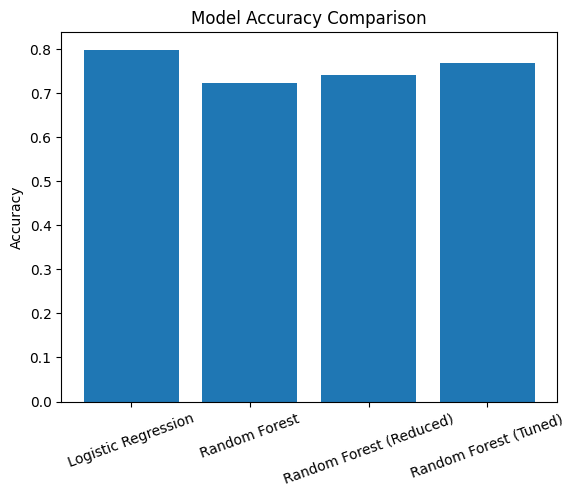

In [140]:
plt.figure()
plt.bar(results["Model"], results["Accuracy"])
plt.xticks(rotation=20)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

Logistic Regression achieves the highest test accuracy, while tuning improves Random Forest compared to the baseline.

### F1-Score Comparison Visualization

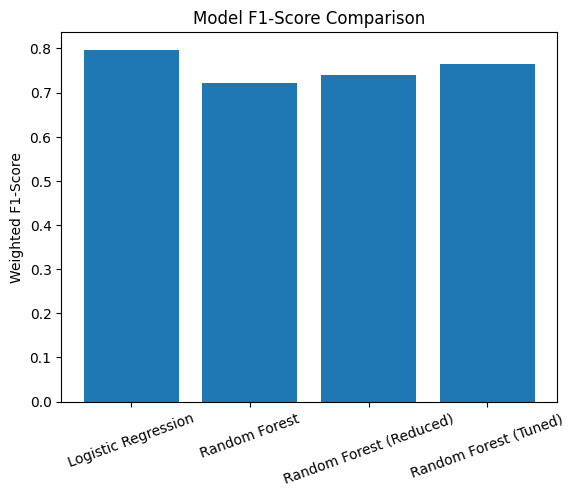

In [141]:
plt.figure()
plt.bar(results["Model"], results["F1 (Weighted)"])
plt.xticks(rotation=20)
plt.ylabel("Weighted F1-Score")
plt.title("Model F1-Score Comparison")
plt.show()

Logistic Regression has the highest weighted F1-score, and tuning improves Random Forest performance.

### Performance Trend Across Model Improvements

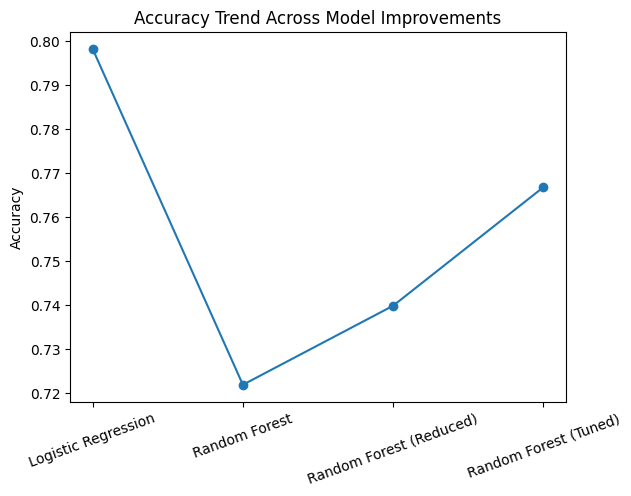

In [142]:
plt.figure()
plt.plot(results["Model"], results["Accuracy"], marker="o")
plt.xticks(rotation=20)
plt.ylabel("Accuracy")
plt.title("Accuracy Trend Across Model Improvements")
plt.show()

Random Forest performance improves step by step after feature reduction and tuning, though Logistic Regression remains the strongest overall.

**Overall conclusion:** Logistic Regression provides the strongest baseline performance, while feature reduction and tuning improve Random Forest results.